In [1]:
%cd trading-game/rl_game/game

/home/shuai/trading-game


In [2]:
import numpy as np
import pandas as pd
import json

pd.set_option('display.max_columns', None)

In [7]:
import ctypes

soFile = "./game.so"
expso = ctypes.cdll.LoadLibrary(soFile)

In [8]:
info_names = [
    "Done",
    "LastPrice",
    "BidPrice1",
    "BidVolume1",
    "AskPrice1",
    "AskVolume1",
    "BidPrice2",
    "BidVolume2",
    "AskPrice2",
    "AskVolume2",
    "BidPrice3",
    "BidVolume3",
    "AskPrice3",
    "AskVolume3",
    "BidPrice4",
    "BidVolume4",
    "AskPrice4",
    "AskVolume4",
    "BidPrice5",
    "BidVolume5",
    "AskPrice5",
    "AskVolume5",
    "Volume",
    "HighestPrice",
    "LowestPrice",
    "TradingDay",
    "Target_Num",
    "Actual_Num",
    "AliveBidPrice1",
    "AliveBidVolume1",
    "AliveBidPrice2",
    "AliveBidVolume2",
    "AliveBidPrice3",
    "AliveBidVolume3",
    "AliveAskPrice1",
    "AliveAskVolume1",
    "AliveAskPrice2",
    "AliveAskVolume2",
    "AliveAskPrice3",
    "AliveAskVolume3",
    "score",
    "profit",
    "total_profit",
    "action",
    "reward"
]

In [21]:

all_data = []

for start_day in range(1, 63):

    arr_len = 100
    arr1 = ctypes.c_int * arr_len
    arr = ctypes.c_int * 1
    
    actions = arr1()
    action_len = arr()
    infos = arr1()
    infos_len = arr()
    rewards = arr1()
    rewards_len = arr()
    
    start_info = {"date_index": f"{start_day} - {start_day}", "skip_steps": 0}
    ctx = expso.CreateContext(json.dumps(start_info).encode())
    
    step = 1
    while True:
        
        expso.GetInfo(ctx, infos, infos_len)
        expso.GetReward(ctx, rewards, rewards_len)
        
        info_dict = {}
        for i in range(40):
            info_dict[info_names[i]] = infos[i]
        for i in range(3):
            info_dict[info_names[i+40]] = rewards[i]
        all_data.append(info_dict)
        
        done = infos[0]
        if done == 1:
            print(infos[25], step)
            expso.ReleaseContext(ctx)
            break
        expso.Step(ctx)
        step += 1
print(len(all_data))
all_data_df = pd.DataFrame(all_data)

41 225016
42 225016
43 225016
44 225016
45 192623
46 225018
47 247995
48 225016
49 225016
50 225016
51 225016
52 225018
53 99198
54 225018
55 225016
56 225016
57 225016
58 225016
59 99006
60 225016
61 225018
62 99010
4563112


In [23]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4563112 entries, 0 to 4563111
Data columns (total 43 columns):
 #   Column           Dtype
---  ------           -----
 0   Done             int64
 1   LastPrice        int64
 2   BidPrice1        int64
 3   BidVolume1       int64
 4   AskPrice1        int64
 5   AskVolume1       int64
 6   BidPrice2        int64
 7   BidVolume2       int64
 8   AskPrice2        int64
 9   AskVolume2       int64
 10  BidPrice3        int64
 11  BidVolume3       int64
 12  AskPrice3        int64
 13  AskVolume3       int64
 14  BidPrice4        int64
 15  BidVolume4       int64
 16  AskPrice4        int64
 17  AskVolume4       int64
 18  BidPrice5        int64
 19  BidVolume5       int64
 20  AskPrice5        int64
 21  AskVolume5       int64
 22  Volume           int64
 23  HighestPrice     int64
 24  LowestPrice      int64
 25  TradingDay       int64
 26  Target_Num       int64
 27  Actual_Num       int64
 28  AliveBidPrice1   int64
 29  AliveBidVolume

In [24]:
all_data_df.to_csv("/home/shuai/day_1-62.csv", index = None)

In [3]:
day_1_62 = pd.read_csv("/home/shuai/day_1-62.csv")

In [5]:
day_1_62["score"]

KeyError: 'score'

In [6]:
day_1_62.rename(columns={'score ':'score'},inplace=True)

In [7]:
day_1_62['score']

0             0
1             0
2             0
3             0
4             0
           ... 
13637573    224
13637574    224
13637575    224
13637576    224
13637577    224
Name: score, Length: 13637578, dtype: int64

In [8]:
day_1_62.to_csv("/home/shuai/day_1-62.csv", index = None)

In [9]:
aa = pd.read_csv("/home/shuai/day_1-62.csv")

In [10]:
day_1_62.equals(aa)

True

In [11]:
aa["score"]

0             0
1             0
2             0
3             0
4             0
           ... 
13637573    224
13637574    224
13637575    224
13637576    224
13637577    224
Name: score, Length: 13637578, dtype: int64

In [17]:
day_1_62.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13637578 entries, 0 to 13637577
Data columns (total 43 columns):
 #   Column           Dtype
---  ------           -----
 0   Done             int64
 1   LastPrice        int64
 2   BidPrice1        int64
 3   BidVolume1       int64
 4   AskPrice1        int64
 5   AskVolume1       int64
 6   BidPrice2        int64
 7   BidVolume2       int64
 8   AskPrice2        int64
 9   AskVolume2       int64
 10  BidPrice3        int64
 11  BidVolume3       int64
 12  AskPrice3        int64
 13  AskVolume3       int64
 14  BidPrice4        int64
 15  BidVolume4       int64
 16  AskPrice4        int64
 17  AskVolume4       int64
 18  BidPrice5        int64
 19  BidVolume5       int64
 20  AskPrice5        int64
 21  AskVolume5       int64
 22  Volume           int64
 23  HighestPrice     int64
 24  LowestPrice      int64
 25  TradingDay       int64
 26  Target_Num       int64
 27  Actual_Num       int64
 28  AliveBidPrice1   int64
 29  AliveBidVolu

In [ ]:
day_1_62[day_1_62["LastPrice"]>0].plot()

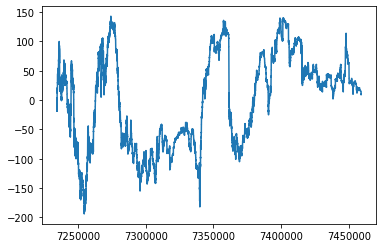

In [49]:
day_1_62[day_1_62["TradingDay"] == 33]["Target_Num"].plot()